Name | Matr.Nr. | Due Date
:--- | ---: | ---:
Aral Cimcim | K11720457 | 27.11.2023, 08:00

<h1 style="color:rgb(0,120,170)">Hands-on AI I</h1>
<h2 style="color:rgb(0,120,170)">Unit 4 &ndash; Logistic Regression as a Door Opener to Deep Learning</h2>

<b>Authors:</b> Brandstetter, Schäfl, Winter, Parada-Cabaleiro, Schörgenhumer<br>
<b>Date:</b> 13-11-2023

This file is part of the "Hands-on AI I" lecture material. The following copyright statement applies to all code within this file.

<b>Copyright statement:</b><br>
This material, no matter whether in printed or electronic form, may be used for personal and non-commercial educational use only. Any reproduction of this material, no matter whether as a whole or in parts, no matter whether in printed or in electronic form, requires explicit prior acceptance of the authors.

<h3 style="color:rgb(0,120,170)">How to use this notebook</h3>

This notebook is designed to run from start to finish. There are different tasks (displayed in <span style="color:rgb(248,138,36)">orange boxes</span>) which require your contribution (in form of code, plain text, ...). Most/All of the supplied functions are imported from the file <code>u4_utils.py</code> which can be seen and treated as a black box. However, for further understanding, you can look at the implementations of the helper functions. In order to run this notebook, the packages which are imported at the beginning of <code>u4_utils.py</code> need to be installed.

<div class="alert alert-warning">
    <b>Important:</b> When specifying a seed for the sources of randomness, use the <code>u4.set_seed(seed=XYZ)</code> function.
</div>

In [156]:
# Required packages and the u4_utils file
import u4_utils as u4
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import torch
from itertools import islice, combinations, product
from torchvision.datasets import MNIST
from types import SimpleNamespace

# Set plotting style of seaborn related plots.
sns.set()

# Setup Jupyter notebook (warning: this may affect all Jupyter notebooks running on the same Jupyter server).
u4.setup_jupyter()

In [157]:
u4.check_module_versions()

Installed Python version: 3.9 (✓)
Installed numpy version: 1.26.0 (✓)
Installed pandas version: 2.1.3 (✓)
Installed scikit-learn version: 1.3.2 (✓)
Installed matplotlib version: 3.8.0 (✓)
Installed seaborn version: 0.13.0 (✓)
Installed scipy version: 1.11.4 (✓)
Installed torch version: 2.1.1+cpu (✓)


<h2>Exercise 1</h2>

Given the dataset defined below, use the functions from <code>u4_utils.py</code> (according to the instructions given in the lecture notebook) to perform the following tasks:

<table>
    <tr>
        <th>Parameter</th>
        <th>Value (used in this notebook)</th>
        <th>Description</th>
    </tr>
    <tr>
        <td><code>num_pairs</code></td>
        <td>75</td>
        <td>amount of $(x, y)$ pairs to generate</td>
    </tr>
    <tr>
        <td><code>variance</code></td>
        <td>0.2</td>
        <td>variance within $y$ w.r.t. defining function</td>
    </tr>
</table>

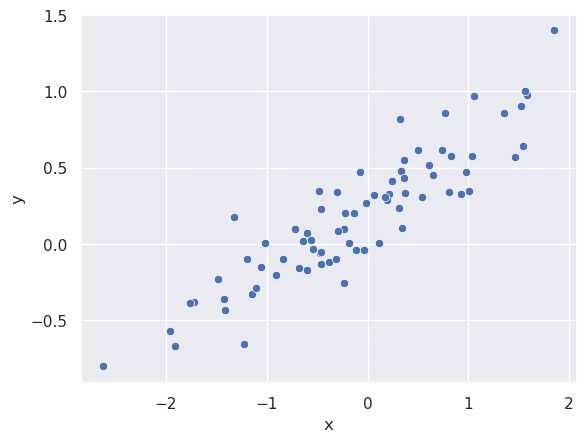

In [158]:
# Set seed for reproducibility.
u4.set_seed(seed=42)

# Create dataset consisting of random (x, y) pairs.
dataset = u4.get_dataset(
    num_pairs=75,
    variance=0.2
)

# Plot the dataset.
sns.scatterplot(data=dataset, x="x", y="y");

<div class="alert alert-warning">
    <b>Exercise 1.1. [4 Points]</b>
    <ul>
        <li>In order to find the <b>linear</b> model which best describes the given dataset, look for the optimal parameters $d$ and $k$ manually.</li>
        <li>Then, plot both the data pairs and the linear model (defined by your coefficients).</li>
        <li>For reproducibility, set a fixed seed (seed=42).</li>
    </ul>
</div>

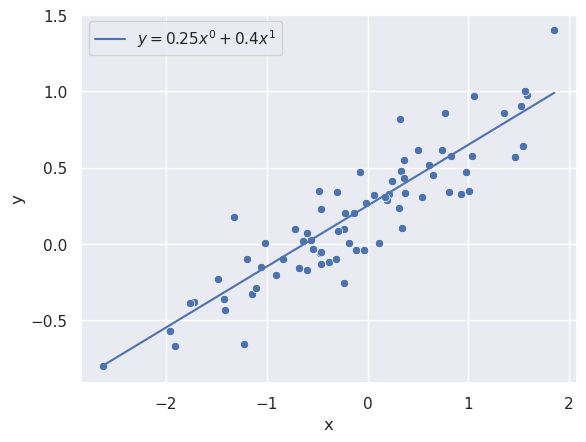

In [159]:
# Set the seed.
u4.set_seed(seed=42)

# Manually define coefficients of an underlying linear model.
coefficients = (
    0.25,  # intercept
    0.40   # slope
)

# Plot data pairs as well as the defined linear model.
u4.plot_model(
    dataset=dataset,
    coefficients=coefficients
)

<div class="alert alert-warning">
    <b>Exercise 1.2. [2 Points]</b>
    <ul>
        <li>Perform the previous task but this time by setting the parameters "automatically", in a way that the <b>Mean Squared Error</b> between the linear model and the data pairs is minimized.</li>
        <li>Again, plot both the data pairs and the linear model.</li>
    </ul>
</div>

In [160]:
coefficients = u4.minimize_mse(
    dataset=dataset,
    degree=1  # just as above, use a polynomial of degree 1, i.e., a straight line
)

print("The coefficients minimizing the MSE are:")
for i, c in enumerate(coefficients):
    print(f"    coefficient {i}: {c}")

The coefficients minimizing the MSE are:
    coefficient 0: 0.22922770185266217
    coefficient 1: 0.40606448529507444


<div class="alert alert-warning">
    <b>Exercise 1.3. [2 Points]</b>
    <ul>
        <li>Assume that the automatically found parameter values differ from the true, underlying parameter values.</li>
        <li>Briefly describe at least two possible reasons for this behavior.</li>
    </ul>
</div>

Reasons: Variation in the samples, estimation bias, deterministic learning algorithm, relations between independent variables.

<h2>Exercise 2</h2>

<div class="alert alert-warning">
    <b>Important:</b> For reproducibility, for each of the following tasks, set a fixed seed (seed=42).
</div>

<div class="alert alert-warning">
    <b>Exercise 2.1. [6 Points]</b>
    <ul>
        <li>Generate a new dataset considering the characteristics defined below and plot both the dataset and the underlying model.</li>
        <table>
            <tr>
                <th>Parameter</th>
                <th>Value (used in this notebook)</th>
                <th>Description</th>
            </tr>
            <tr>
                <td><code>num_pairs</code></td>
                <td>25</td>
                <td>amount of $(x, y)$ pairs to generate</td>
            </tr>
            <tr>
                <td><code>variance</code></td>
                <td>0.5</td>
                <td>variance within $y$ w.r.t. defining function</td>
            </tr>
            <tr>
                <td><code>coefficients</code></td>
                <td><code>np.random.rand(4)</code></td>
                <td>upper bound of random polynomial degree</td>
            </tr>
        </table>
        <li>When defining the dataset, pass the random coefficients for the underlying model via the parameter <code>coefficients</code>. Also make sure to use the same random coefficients for plotting.</li>
    </ul>
</div>

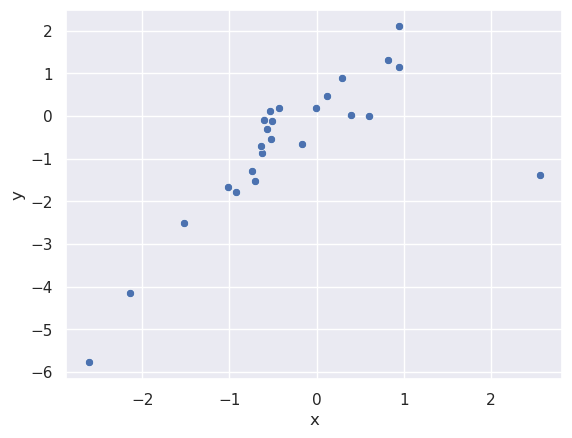

In [161]:
# Set seed for reproducibility.
u4.set_seed(seed=42)

random_coefficients = np.random.rand(4)

# Create dataset conisting of random (x, y) pairs.
new_dataset = u4.get_dataset_unknown(
    num_pairs=25,
    variance=0.5
)

# Plot the dataset.
sns.scatterplot(data=new_dataset, x="x", y="y");

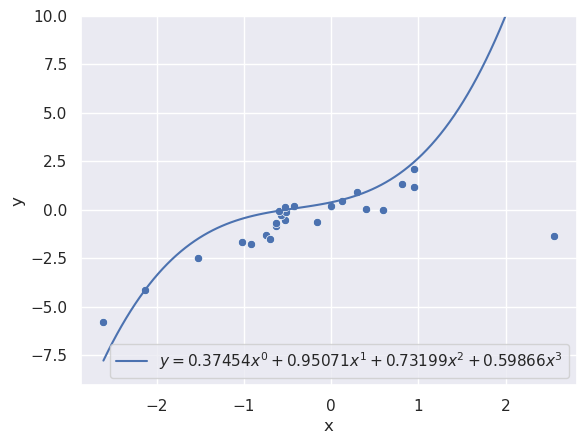

In [162]:
# Plot data pairs as well as the defined linear model.
u4.plot_model(
    dataset=new_dataset,
    coefficients=random_coefficients
)

<div class="alert alert-warning">
    <b>Exercise 2.2. [6 Points]</b>
    <ul>
        <li>Define a model by "automatically" retrieving the optimal coefficients which minimize the MSE.</li>
        <li>Then, print out the optimal coefficients and plot both the data pairs and the optimized model.</li>
    </ul>
</div>

In [163]:
# Automatically retrieve the optimal coefficients that minimize MSE.
auto_coefficients = u4.minimize_mse(
    dataset=new_dataset,
    degree=3
)

# Print out the results.
print("The coefficients minimizing the MSE are:")
for i, c in enumerate(auto_coefficients):
    print(f"    coefficient {i}: {c}")

The coefficients minimizing the MSE are:
    coefficient 0: 0.3409406832134406
    coefficient 1: 1.3697590036880383
    coefficient 2: -0.5658893846873597
    coefficient 3: -0.08434082677840242


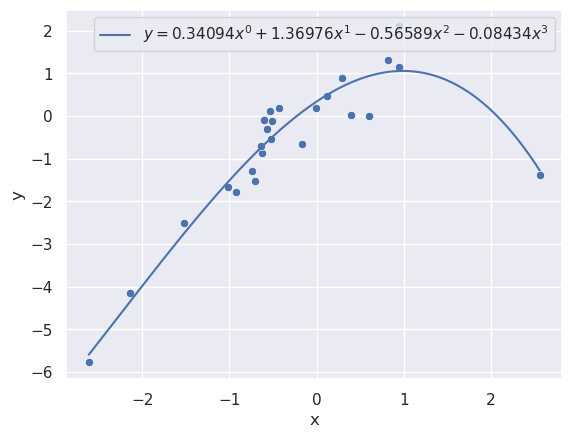

In [164]:
# Plot the optimized model. 
u4.plot_model(
    dataset=new_dataset,
    coefficients=auto_coefficients
)

<div class="alert alert-warning">
    <b>Exercise 2.3. [4 Points]</b>
    <ul>
        <li>Compute and print out the difference between the random coefficients from the underlying model (used to generate the dataset) and the optimal coefficients ("automatically" computed) which minimize the MSE.</li>
    </ul>
</div>

In [165]:
# Set the seed. 
u4.set_seed(seed=42)

# Randomly generate coefficients.
random_coefficients = np.random.rand(4)

# Auto-retrieve the MSE minimizers.
auto_coefficients = u4.minimize_mse(
    dataset=new_dataset,
    degree=3
)

# Compute the difference.
difference = [random_coefficients - auto_coefficients for random_coefficients, auto_coefficients in zip(random_coefficients, auto_coefficients)]

# Print out the differecens.
for i in range(len(difference)):
    print(f"The difference between random coefficients and optimal coefficients for coefficient {i} is {difference[i]}")


The difference between random coefficients and optimal coefficients for coefficient 0 is 0.03359943563392187
The difference between random coefficients and optimal coefficients for coefficient 1 is -0.4190446972781221
The difference between random coefficients and optimal coefficients for coefficient 2 is 1.2978833264987648
The difference between random coefficients and optimal coefficients for coefficient 3 is 0.682999310975439


<div class="alert alert-warning">
    <b>Exercise 2.4. [1 Points]</b>
    <ul>
        <li>Visually inspect the previous plot and keep the (possible) differences in parameter values in mind, which regions are especially prone to high errors?</li>
        <li>Please keep in mind that "prone to" does not automatically and always imply "guaranteed to".</li>
        <li>You do not need to set a seed for this task.</li>
    </ul>
</div>

The highest differences are for coefficients 2 and 3. There is also a high difference for the linear term. MSE seems to perform better for outliers in the data.

<h2>Exercise 3</h2>

In this exercise, we will consider that $y$ is a binary variable, i.e., the label of each data point is either 0 or 1. Under this premise, we will create a new dataset.

<div class="alert alert-warning">
    <b>Exercise 3.1. [5 Points]</b>
    <ul>
        <li>Following the lecture notebook, choose the correct function from <code>u4_utils.py</code> to generate a dataset with binary labels consisting of 25 data pairs (feature, label). Then, plot it.</li>
        <li>For reproducibility, choose a fixed random seed of seed=27.</li>
    </ul>
</div>

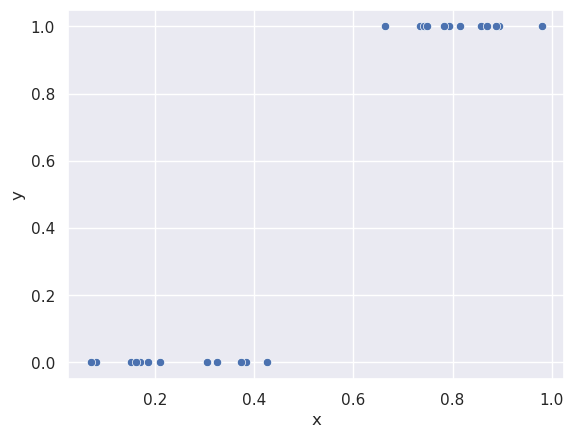

In [166]:
# Set seed for reproducibility.
u4.set_seed(seed=27)

# Create dataset conisting of random (x, y) pairs.
binary_dataset = u4.get_dataset_logistic(num_pairs=25)

# Plot the dataset.
sns.scatterplot(data=binary_dataset, x="x", y="y");

<div class="alert alert-warning">
    <b>Exercise 3.2. [5 Points]</b>
    <ul>
        <li>Use the corresponding function in <code>u4_utils.py</code> to minimize the cross entropy loss and choose the combination of hyperparameters that enables the logistic regression model to best separate the two classes.</li>
        <li>Then, plot the dataset and the logistic regression model. Retrieve the optimal combination by taking the following values for each hyperparameter into account:</li>
        <table style="text-align:center;vertical-align:middle">
            <th>Hyperparameter</th>
            <th>Values</th>
            <tr>
                <td><code>iterations</code></td>
                <td>10, 100</td>
            </tr>
            <tr>
                <td><code>learning_rate</code></td>
                <td>1, 10.0, 100.0</td>
            </tr>
            <tr>
                <td><code>momentum</code></td>
                <td>0.3, 0.9</td>
            </tr>
        </table>
        <li>For determining the best hyperparameters in this example, it is enough to simply look at the resulting model plot, i.e., you do not have to make any computations, a visual check is sufficient.</li>
    </ul>
</div>

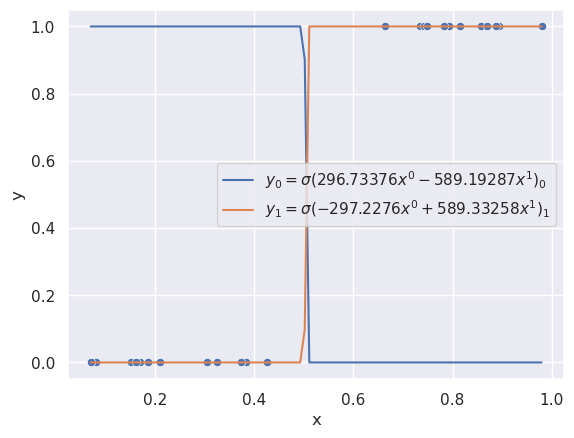

In [183]:
# Set seed for reproducibility.
u4.set_seed(seed=27)

# Minimize cross-entropy loss
coefficients = u4.minimize_ce(
    dataset=binary_dataset,
    iterations=100,
    learning_rate=100,
    momentum=0.9
)

# Plot data pairs as well as the defined logistic model.
u4.plot_logistic_model(
    dataset=binary_dataset,
    coefficients=coefficients
)

<h2>Exercise 4</h2>

Considering again a binary classification problem, we will now workwith the <code>DataSet_LR_a.csv</code> (same as in the lecture notebook).

<div class="alert alert-warning">
    <b>Exercise 4.1. [5 Points]</b>
    <ul>
        <li>Load and process the dataset as shown in the lecture notebook but this time considering 75% (parameter <code>frac</code>) of the samples for training and 25% for testing.</li>
        <li>For reproducibility, set a seed=42.</li>
    </ul>
</div>

In [168]:
# Set seed for reproducibility.
u4.set_seed(seed=42)

# Load dataset from <*.csv> file.
dataset_LR_a = u4.get_dataset_from_csv(path='resources/DataSet_LR_a.csv')

# Split dataset into a training and a test set.
dataset_train = dataset_LR_a.sample(frac=0.75, replace=False, axis=0)
dataset_test = dataset_LR_a.drop(dataset_train.index)

<div class="alert alert-warning">
    <b>Exercise 4.2. [8 Points]</b>
    <ul>
        <li>Considering <code>iterations=1000</code> and <code>momentum=0.9</code> and by using the function to minimize the cross entropy loss, find a learning rate that enables the logistic regression model to achieve an accuracy on the <b>test set</b> higher than 88%.</li>
        <li>Print out the model's accuracy.</li>
        <li>For reproducibility, set a seed=42.</li>
    </ul>
</div>

In [169]:
# Set seed for reproducibility.
u4.set_seed(seed=42)

# Load dataset from <*.csv> file.
dataset_LR_a = u4.get_dataset_from_csv(path='resources/DataSet_LR_a.csv')

# Split dataset into a training and a test set.
dataset_train = dataset_LR_a.sample(frac=0.75, replace=False, axis=0)
dataset_test = dataset_LR_a.drop(dataset_train.index)

# Set a range to test the learning rates.
learning_rates = [0.1, 1, 10, 100]

# Iterate through the learning rates, stop when > 88%
for learning_rate in learning_rates:

    # Minimize cross-entropy loss.
    coefficients = u4.minimize_ce(
        dataset=dataset_train,
        iterations=1000,
        learning_rate=learning_rate,
        momentum=0.9
    )

    # Compute predictions of trained logistic regression model w.r.t. the training data.
    predictions = u4.predict_logistic(dataset_test.drop(columns="y"), coefficients)

    # Compute accuracy given the predicted and the true training labels.
    accuracy_test = (predictions == dataset_test["y"]).mean()
    print(f"Learning rate {learning_rate} | Accuracy on training set: {accuracy_test:.4f}")
        

Learning rate 0.1 | Accuracy on training set: 0.9000
Learning rate 1 | Accuracy on training set: 0.9000
Learning rate 10 | Accuracy on training set: 0.9000
Learning rate 100 | Accuracy on training set: 0.5667


<div class="alert alert-warning">
    <b>Exercise 4.3. [6 Points]</b>
    <ul>
        <li>Plot the 2D test dataset, once showing the true, actual labels (ground truth) and once showing the predicted labels.
        <li>You need to draw the plots in two rows and one coloum.</span></li>
</li>
    </ul>
</div>

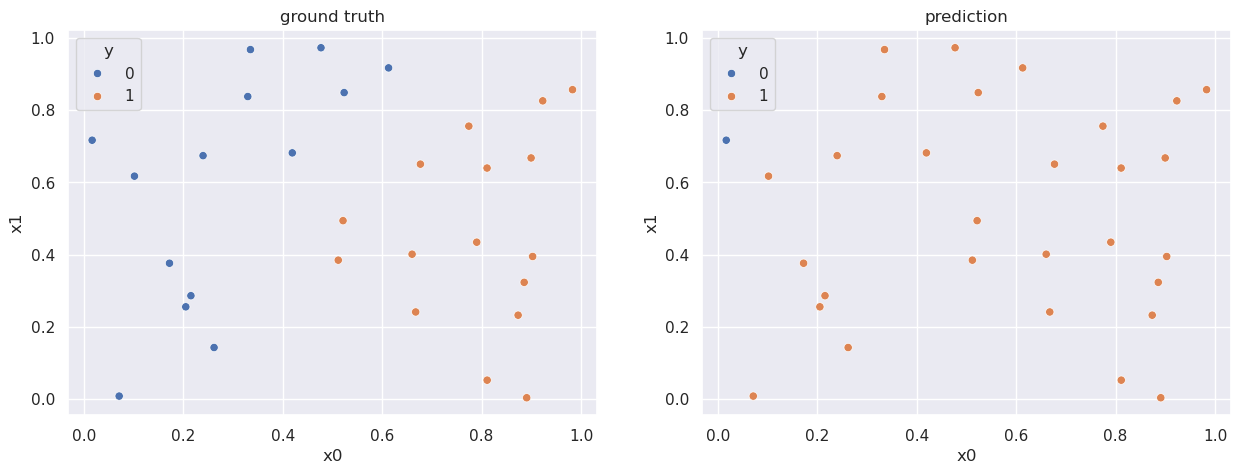

In [171]:
# Plot data pairs as well as the predictions according to the defined logistic model.
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# Plot ground truth labels.
axes[0].set_title("ground truth")
sns.scatterplot(data=dataset_test, x="x0", y="x1", hue="y", ax=axes[0])

# Plot predicted labels.
axes[1].set_title("prediction")
sns.scatterplot(data=dataset_test.assign(y=predictions), x="x0", y="x1", hue="y", ax=axes[1])
plt.show()

<h2>Exercise 5</h2>

Considering the framework PyTorch and the instructions given in the lecture notebook, perform the following tasks:

<div class="alert alert-warning">
    <b>Exercise 5.1. [5 Points]</b>
    <ul>
        <li>Generate a tensor of 2 dimensions with a shape of 2 x 7, containing random numbers from a standard normal distribution with (mean=0 and stddev=variance=1).</li>
        <li>Print out the tensor and its shape to be sure that your answer is correct.</li>
        <li>For reproducibility, set seed=42.</li>
    </ul>
</div>

In [18]:
# Set seed for reproducibility.
u4.set_seed(seed=42)

# Set the shape.
shape = (2,7)

# Generate the tensor.
x = torch.randn(shape)

# Print the tensor.
x

tensor([[ 0.3367,  0.1288,  0.2345,  0.2303, -1.1229, -0.1863,  2.2082],
        [-0.6380,  0.4617,  0.2674,  0.5349,  0.8094,  1.1103, -1.6898]])

<div class="alert alert-warning">
    <b>Exercise 5.2. [5 Points]</b>
    <ul>
        <li>Implement the function $g\left(x\right) = 5\cdot{}{x}^2 + 7\cdot{}{x}$ related to the previously generated tensor using PyTorch.</li>
        <li>Print the output of the function considering as input the tensor you have created in the first task of this exercise.</li>
    </ul>
</div>

In [19]:
# Define the function g(x).
def g(x: torch.Tensor) -> torch.Tensor:
    return 5 * (x ** 2) + (7 * x)

# Apply the function.
y = g(x)

# Print the output.
y

tensor([[ 2.9236,  0.9846,  1.9161,  1.8776, -1.5560, -1.1307, 39.8382],
        [-2.4308,  4.2972,  2.2288,  5.1749,  8.9408, 13.9358,  2.4485]])

<div class="alert alert-warning">
    <b>Exercise 5.3. [5 Points]</b>
    <ul>
        <li>Compute the gradient of the previously defined function $g\left(x\right)$ for $x = 0.5$ using the automatic differentiation functionality of PyTorch.</li>
        <li>Following the lecture notebook, print $x$ as a tensor, the output of the function $g(x)$, and the gradient $g'(x)$.</li>
    </ul>
</div>

In [20]:
# Gradient w.r.t. "x".
# Tensor with x = 0.5
x = torch.tensor(0.5, requires_grad=True)
print(f'x     = {x.item()}')

# Apply the function to tensor "x".
y = g(x)
print(f'g(x)  = {y.item()}')

# Compute the gradient w.r.t "x".
dy = torch.autograd.grad(y, x)
print(f"g'(x) = {dy[0].item()}")

x     = 0.5
g(x)  = 4.75
g'(x) = 12.0


<h2>Exercise 6</h2>

With the FashionMNIST dataset, perform the following tasks:

<div class="alert alert-warning">
    <b>Important:</b> For reproducibility, for each of the following tasks, set a fixed seed (seed=27).
</div>

<div class="alert alert-warning">
    <b>Exercise 6.1. [3 Points]</b>
    <ul>
        <li>Set the following hyperparameters (hint: <code>epochs</code> is the same as <code>iterations</code>):</li>
    </ul>

Hyperparameter | Value
:--- | :---
`batch_size` | 9
`epochs` | 1
`learning_rate` | 1e-2
`momentum` | 7e-1
</div>

In [172]:
# Set seed for reproducibility.
u4.set_seed(seed=27)

# Set hyperparameters to be used in the training process.
hyperparameters = SimpleNamespace(
    batch_size=9,
    epochs=1,
    learning_rate=1e-2,
    momentum=7e-1
)

<div class="alert alert-warning">
    <b>Exercise 6.2. [5 Points]</b>
    <ul>
        <li>Get the data loaders for the training and test <b>FashionMNIST</b> data (<code>u4.get_dataset_fashionmnist()</code>). Fetch the samples and targets.</li>
        <li>Display the numbers of training and test samples.</li>
    </ul>
</div>

In [173]:
# Set seed for reproducibility.
u4.set_seed(seed=27)

# Load fashion MNIST datasets and encapsulate them in data loaders.
train_loader, test_loader = u4.get_dataset_fashionmnist(
    batch_size=hyperparameters.batch_size
)

# Fetch all samples and targets of the Fashion MNIST data set and reshape them accordingly.
samples = torch.stack([x for x, y in train_loader.dataset]).flatten(start_dim=1)
targets = train_loader.dataset.targets

# Print the sizes of the samples and the targets.
print(f"Sample dimensions: {samples.shape}")
print(f"Target dimensions: {targets.shape}")

Sample dimensions: torch.Size([60000, 784])
Target dimensions: torch.Size([60000])


In [23]:
# Print the dimensions of the training and test samples.
print(train_loader.dataset.data.shape)
print(test_loader.dataset.data.shape)

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])


<div class="alert alert-warning">
    <b>Exercise 6.3. [3 Points]</b>
    <ul>
        <li>Display the first 10 samples of test dataset and thier corresponding labels.</li>
    </ul>
</div>

Labels: [9, 2, 1, 1, 6, 1, 4, 6, 5, 7]


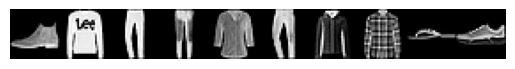

In [105]:
# Set the seed.
u4.set_seed(seed=27)

# Load fashion MNIST datasets and encapsulate them in data loaders.
train_loader, test_loader = u4.get_dataset_fashionmnist(
    batch_size=10
)

# Get the first batch of data from the test set and keep both the images and labels.
batch = next(islice(test_loader, 1))
images, labels = batch[0], batch[1]

# Print the labels
print('Labels:', labels.tolist())

# Transform the image shapes for visualization purposes.
images = np.concatenate([img.squeeze() for img in images], axis=1)

# Display the first batch of data.
plt.imshow(images, cmap='gray')
plt.axis(False)
plt.show()


<div class="alert alert-warning">
    <b>Exercise 6.4. [3 Points]</b>
    <ul>
        <li>Display the fifth batch of training data and drop the labels (keep only the images themselves).</li>
    </ul>
</div>

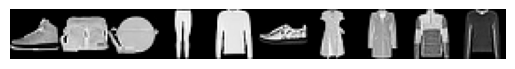

In [106]:
# Set the seed.
u4.set_seed(seed=27)

# Load fashion MNIST datasets and encapsulate them in data loaders.
train_loader, test_loader = u4.get_dataset_fashionmnist(batch_size = 10)

# Set the fifth batch.
batches = islice(train_loader, 4, 5)

for batch in batches:
    # Drop the labels.
    images = batch[0]
    
    # Transform the image shapes for visualization purposes.
    images = np.concatenate([img.squeeze() for img in images], axis=1)
    
    # Display the plot.
    plt.imshow(images, cmap='gray')
    plt.axis(False)
    plt.show()


<div class="alert alert-warning">
    <b>Exercise 6.5. [5 Points]</b>
    <ul>
        <li>Minimize the cross entropy loss using the training data to get the coefficients of the logistic model.</li>
        <li>Get the predictions for the test data using this model and print the accuracy on the test set.</li>
    </ul>
</div>

In [175]:
# Set the seed.
u4.set_seed(seed=27)

train_loader, test_loader = u4.get_dataset_mnist(batch_size=9)

# Minimize cross-entropy loss.
coefficients = u4.minimize_ce(
    dataset=train_loader,
    iterations=1,
    learning_rate=1e-2,
    momentum=7e-1
)

# Fetch all samples and targets of the fashion MNIST data set and reshape them accordingly.
samples = torch.stack([x for x, y in test_loader.dataset]).flatten(start_dim=1)
targets = test_loader.dataset.targets

# Compute predictions of trained logistic regression model w.r.t. the test data.
predictions = u4.predict_logistic(samples, coefficients)

# Compute accuracy given the predicted and the true training labels.
accuracy_test = (predictions == targets.numpy()).mean()
print(f"Accuracy on test set: {accuracy_test:.4f}")

Accuracy on test set: 0.9023


<div class="alert alert-warning">
    <b>Exercise 6.6. [12 Points]</b>
    <ul>
        <li>Keeping <code>batch_size=9</code> and <code>epochs=1</code>, optimize the other two hyperparameters <code>learning_rate</code> and/or <code>momentum</code> in a way that you achieve a better performance (accuracy).</li>
        <li>You need to sort the values in ascending order based on the accuracy. Then, print out the results.</li>
        <li>Hint: You might consider some of the concepts learned in the previous units to automatize this process.</li>
        <li>Hint: Do not forget to set the seed if you want reproducible and comparable results.</li>
    </ul>
</div>

In [177]:
# Set the seed.
u4.set_seed(seed=27)

# Set learning rate and momentum as a list.
learning_rate = [0.01, 1, 10, 100]
momentum = [0.01, 0.1, 0.5, 1]

# Compute the possible combinations.
parameters = list(product(learning_rate, momentum))

results = []

# Loop to optimize the hyperparameters.
for learning_rate, momentum in parameters:

    # Set the seed.
    u4.set_seed(seed=27)

    hyperparameters = SimpleNamespace(
    batch_size=9,
    epochs=1,
    learning_rate=learning_rate,
    momentum=momentum)
    
    # Minimize cross-entropy loss.
    coefficients = u4.minimize_ce(
                dataset=train_loader,
                iterations=hyperparameters.epochs,
                learning_rate=hyperparameters.learning_rate,
                momentum=hyperparameters.momentum)

    # Fetch all samples and targets of the Fashion MNIST data set and reshape them accordingly.
    samples = torch.stack([x for x, y in test_loader.dataset]).flatten(start_dim=1)
    targets = test_loader.dataset.targets

    # Compute predictions of trained logistic regression model w.r.t. the test data.
    predictions = u4.predict_logistic(samples, coefficients)

    # Compute accuracy given the predicted and the true training labels.
    accuracy_test = (predictions == targets.numpy()).mean()

    # Append to results.
    results.append((accuracy_test, learning_rate, momentum))


# Print the results.
for accuracy_test, learning_rate, momentum in sorted(results):
    print(f"Accuracy on test set: {accuracy_test:.4f} for learning rate {learning_rate} and momentum {momentum}")


Accuracy on test set: 0.8659 for learning rate 100 and momentum 0.1
Accuracy on test set: 0.8687 for learning rate 1 and momentum 0.5
Accuracy on test set: 0.8704 for learning rate 10 and momentum 0.5
Accuracy on test set: 0.8738 for learning rate 10 and momentum 0.1
Accuracy on test set: 0.8771 for learning rate 100 and momentum 0.5
Accuracy on test set: 0.8774 for learning rate 100 and momentum 0.01
Accuracy on test set: 0.8787 for learning rate 0.01 and momentum 1
Accuracy on test set: 0.8789 for learning rate 10 and momentum 0.01
Accuracy on test set: 0.8789 for learning rate 100 and momentum 1
Accuracy on test set: 0.8808 for learning rate 10 and momentum 1
Accuracy on test set: 0.8821 for learning rate 1 and momentum 1
Accuracy on test set: 0.8832 for learning rate 1 and momentum 0.01
Accuracy on test set: 0.8861 for learning rate 1 and momentum 0.1
Accuracy on test set: 0.9095 for learning rate 0.01 and momentum 0.5
Accuracy on test set: 0.9136 for learning rate 0.01 and momentu